# Decision Tree

**Author**: Stephanie Golob

**contact**: estefaniagolob@gmail.com

**Date**: July 4, 2022

**Previous Notebook**: 5 of 7 (Logistic Regression)

**Notebook**: 6 of 7 (Decision Tree)

**Next Notebook**: 7 of 7 (XGBoost)

---

In this notebook I'm going to use Decision Tree Classifier models to see if I can improve the precision and recall scores for each class using the original data and the balanced data sets.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Basic-Decision-Tree-Model" data-toc-modified-id="Basic-Decision-Tree-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic Decision Tree Model</a></span></li><li><span><a href="#Model-Optimization-using-original-and-balanced-data-sets" data-toc-modified-id="Model-Optimization-using-original-and-balanced-data-sets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model Optimization using original and balanced data sets</a></span><ul class="toc-item"><li><span><a href="#Original-data" data-toc-modified-id="Original-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Original data</a></span></li><li><span><a href="#Upsampled-Data" data-toc-modified-id="Upsampled-Data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Upsampled Data</a></span></li><li><span><a href="#Downsampled-Data" data-toc-modified-id="Downsampled-Data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Downsampled Data</a></span></li><li><span><a href="#SMOTE-Upsampled-Data" data-toc-modified-id="SMOTE-Upsampled-Data-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>SMOTE Upsampled Data</a></span></li></ul></li><li><span><a href="#Model-Summary-Table" data-toc-modified-id="Model-Summary-Table-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Model Summary Table</a></span></li><li><span><a href="#Feature-Evaluation" data-toc-modified-id="Feature-Evaluation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Feature Evaluation</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

---

Import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# cache memory 
from tempfile import mkdtemp

# save model outputs
import joblib

# modeling
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# model evaluation metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# feature importance
import shap

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

Read in the X_train, y_train, X_validation and y_validation data sets.

In [2]:
X_train = pd.read_pickle("data/X_train.pkl")
y_train = pd.read_pickle("data/y_train.pkl")

X_validation = pd.read_pickle("data/X_validation.pkl")
y_validation = pd.read_pickle("data/y_validation.pkl")

---

## Basic Decision Tree Model

Fit a basic Decision Tree model using the original X_train and y_train data sets.

In [3]:
# instantiate the model using default settings
# use random_state = 10 to make the results reproducible
DT_model = DecisionTreeClassifier(random_state = 10)

# fit the model on the X_train and y_train data
DT_model.fit(X_train, y_train)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model.score(X_train, y_train)}")
print(f"The Validation accuracy is:  {DT_model.score(X_validation, y_validation)}")

The Training accuracy is:  0.9995823220264288
The Validation accuracy is:  0.6800395969703713


The model has overfit to the training data. The max depth needs to be optimized to prevent overfitting. Create a range of max depth values for the model to loop through and save accuracy scores on the training and validations sets for each max depth.

In [4]:
# list for storing accuracy for train and test
train_acc = []
val_acc = []

# start with a wide range of max depth values to see what is appropriate
depth = range(1, 40)

# loop over max_depth values
for d in depth:
    
    print(f"Fitting with max depth = {d}")
    
    # fit the tree
    my_tree = DecisionTreeClassifier(max_depth = d)
    my_tree.fit(X_train, y_train)
    
    # score on train and append accuracy to list
    train_acc.append(my_tree.score(X_train, y_train))
    
    # score on test and append to list
    val_acc.append(my_tree.score(X_validation, y_validation))

Fitting with max depth = 1
Fitting with max depth = 2
Fitting with max depth = 3
Fitting with max depth = 4
Fitting with max depth = 5
Fitting with max depth = 6
Fitting with max depth = 7
Fitting with max depth = 8
Fitting with max depth = 9
Fitting with max depth = 10
Fitting with max depth = 11
Fitting with max depth = 12
Fitting with max depth = 13
Fitting with max depth = 14
Fitting with max depth = 15
Fitting with max depth = 16
Fitting with max depth = 17
Fitting with max depth = 18
Fitting with max depth = 19
Fitting with max depth = 20
Fitting with max depth = 21
Fitting with max depth = 22
Fitting with max depth = 23
Fitting with max depth = 24
Fitting with max depth = 25
Fitting with max depth = 26
Fitting with max depth = 27
Fitting with max depth = 28
Fitting with max depth = 29
Fitting with max depth = 30
Fitting with max depth = 31
Fitting with max depth = 32
Fitting with max depth = 33
Fitting with max depth = 34
Fitting with max depth = 35
Fitting with max depth = 36
F

Plot the training and validation accuracy scores to see how the model performs with different max depth values.

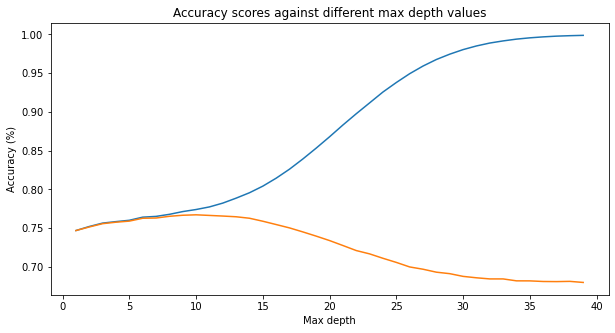

In [5]:
# plot the accuracy scores
plt.figure(figsize = (10, 5))

# plot the training and validation accuracy scores
plt.plot(depth, train_acc, label = "train")
plt.plot(depth, val_acc, label = "validation")

# set the plot title and axes labels
plt.title("Accuracy scores against different max depth values")
plt.xlabel("Max depth")
plt.ylabel("Accuracy (%)")

plt.show()

The model training and validation accuracy start to diverge around max depth of 15, the model starts to overfit strongly after this point. Around max depth 12 both the training and validation sets seemed to be optimized so I will re-run a Decision Tree model using max_depth = 12 to get a better idea of how the model is performing with its predictions.

In [6]:
# instantiate the model using max_depth = 12
DT_model = DecisionTreeClassifier(random_state = 10, max_depth = 12)

# fit the model on the X_train and y_train data
DT_model.fit(X_train, y_train)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model.score(X_train, y_train)}")
print(f"The Validation accuracy is:  {DT_model.score(X_validation, y_validation)}")

The Training accuracy is:  0.7823963533752984
The Validation accuracy is:  0.7655951439994475


The training and validation scores are similar as expected from the plot above. I need to plot the confusion matrix and get the results from the classification report to know how the model is making predictions. 

Use `plot_confusion_matrix` and input the model and X_validation and y_validation data sets to get the predictions for each class.

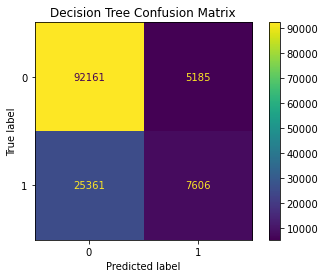

In [7]:
plot_confusion_matrix(DT_model, X_validation, y_validation)
plt.title("Decision Tree Confusion Matrix");

The model predicts Class 0 the majority of the time.

Calculate the model predictions using the X_validation set, which will be used to create the classification report.

In [8]:
y_predictions = DT_model.predict(X_validation)

Use y_validation and y_predictions to create the classification report which will output the precision, recall and f1-scores for each class.

In [9]:
report = classification_report(y_validation, y_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     97346
           1       0.59      0.23      0.33     32967

    accuracy                           0.77    130313
   macro avg       0.69      0.59      0.60    130313
weighted avg       0.74      0.77      0.72    130313



The base Decision Tree model performs better than the base Logistic Regression model. Although it is still predicting class 0 most of the time, the precision and recall scores are comparatively better for class 1.

---

## Model Optimization using original and balanced data sets

I'm going to create a pipeline to optimize the Decision Tree models using the balanced and original data sets. I will then make predictions and compare the model outputs using the confusion matrices and precision, recall and f1-scores.

- First - original data
- Second - Upsampled data
- Third - Downsampled data
- Fourth - SMOTE Upsampled data

### Original data

In [11]:
# create a directory to cache the memory in case the kernel crashes so it doesn't have to fit the grid from
# the beginning again
cachedir = mkdtemp()

# create a list of tuples to store the functions that will be completed in the pipeline
# instantiate the Decision Tree model
estimators = [('model', DecisionTreeClassifier())]

# intialize the pipeline, input estimators as the steps for the pipeline to take
# set the memory to cachedir
pipe = Pipeline(estimators, memory = cachedir)

# set the parameters that you want GridSearchCV to iterate through
# Loop through max depth values 1-15
# loop through min_samples_leaf values 1-1000, by steps of 100
# use decision tree classifier since it's a classification problem
parameters = [
            {'model': [DecisionTreeClassifier()],
             'model__max_depth': np.arange(1, 16),
             'model__min_samples_leaf': np.arange(1, 1000, 100)
            }
]

orig_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

orig_fitgrid = orig_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_sam

[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.5s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTree

[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   0.7s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.8s
[CV] END model=Decision

[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=501; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.8s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.9s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.9s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.0s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.0s
[CV] END m

Save the model output using `dump` from the joblib library.

In [12]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(orig_fitgrid, 'Models/DT_orig_grid.pkl')

['Models/DT_orig_grid.pkl']

View the results from gridsearchcv in a dataframe using `cv_results_` to get all the outputs from each cross-validation.

In [13]:
orig_df = pd.DataFrame(orig_fitgrid.cv_results_)
orig_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.300911,0.004187,0.097965,0.000637,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,1,"{'model': DecisionTreeClassifier(max_depth=14,...",0.747011,0.747011,0.747024,0.747007,0.747007,0.747012,0.000006,141
1,0.297891,0.004002,0.098214,0.000910,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,101,"{'model': DecisionTreeClassifier(max_depth=14,...",0.747011,0.747011,0.747024,0.747007,0.747007,0.747012,0.000006,141
2,0.295958,0.002529,0.097920,0.000585,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,201,"{'model': DecisionTreeClassifier(max_depth=14,...",0.747011,0.747011,0.747024,0.747007,0.747007,0.747012,0.000006,141
3,0.296582,0.001404,0.098352,0.000744,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,301,"{'model': DecisionTreeClassifier(max_depth=14,...",0.747011,0.747011,0.747024,0.747007,0.747007,0.747012,0.000006,141
4,0.294886,0.003529,0.097840,0.000322,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,401,"{'model': DecisionTreeClassifier(max_depth=14,...",0.747011,0.747011,0.747024,0.747007,0.747007,0.747012,0.000006,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.917938,0.004323,0.101944,0.000632,"DecisionTreeClassifier(max_depth=14, min_sampl...",15,501,"{'model': DecisionTreeClassifier(max_depth=14,...",0.766662,0.765823,0.765869,0.765770,0.765375,0.765900,0.000419,28
146,0.899291,0.007745,0.102280,0.000717,"DecisionTreeClassifier(max_depth=14, min_sampl...",15,601,"{'model': DecisionTreeClassifier(max_depth=14,...",0.765922,0.766168,0.766395,0.765688,0.765540,0.765942,0.000311,25
147,0.877712,0.009580,0.101738,0.000171,"DecisionTreeClassifier(max_depth=14, min_sampl...",15,701,"{'model': DecisionTreeClassifier(max_depth=14,...",0.765379,0.766185,0.765425,0.765869,0.764635,0.765498,0.000524,43
148,0.853622,0.005169,0.101438,0.000249,"DecisionTreeClassifier(max_depth=14, min_sampl...",15,801,"{'model': DecisionTreeClassifier(max_depth=14,...",0.764738,0.763998,0.765523,0.764602,0.764898,0.764752,0.000491,55


Use `best_estimator_` to get the parameters for the best model given by gridsearchcv.

In [14]:
orig_fitgrid.best_estimator_

Pipeline(memory='/var/folders/z5/1yfbtl1s4fvfx1dypyr78xq40000gn/T/tmpf632ktom',
         steps=[('model',
                 DecisionTreeClassifier(max_depth=14, min_samples_leaf=101))])

The best parameters selected by gridsearchcv were a max depth of 14 and a min samples leaf size of 101. 

Fit a Decision Tree model with the parameters given by the best_estimator_ output.

In [15]:
# instantiate the model using the parameters given by the best_estimator_ output
DT_model = DecisionTreeClassifier(random_state = 10, max_depth = 14, min_samples_leaf = 101)

# fit the model on the X_train and y_train data
DT_model.fit(X_train, y_train)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model.score(X_train, y_train)}")
print(f"The Validation accuracy is:  {DT_model.score(X_validation, y_validation)}")

The Training accuracy is:  0.77444731666568
The Validation accuracy is:  0.7681121607207263


The training and validation accuracy is very similar, the model did not overfit to the training data. Look at confusion matrix and classification report to understand how the model is making predictions for each class.

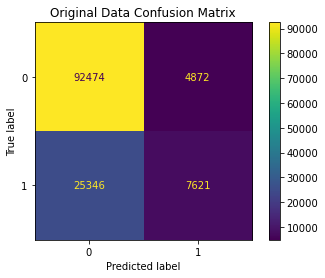

In [16]:
plot_confusion_matrix(DT_model, X_validation, y_validation)
plt.title("Original Data Confusion Matrix");

The model is still predicting class 0 primarily. I need to review the precision, recall and f1-scores to see if this is an improvement over the base model with some max depth tuning.

Calculate the model predictions using X_validation.

In [17]:
y_predictions_orig = DT_model.predict(X_validation)

Create a classification report using the predictions and y_validation.

In [18]:
report_orig = classification_report(y_validation, y_predictions_orig)
print(report_orig)

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     97346
           1       0.61      0.23      0.34     32967

    accuracy                           0.77    130313
   macro avg       0.70      0.59      0.60    130313
weighted avg       0.74      0.77      0.73    130313



The optimized Decision Tree model is performing similarly to the base Decision Tree model, with a slight improvement to Class 1 precision. I will now test whether the model improves at predicting Class 1 using the upsampled data.

---

### Upsampled Data

Read in X_train and y_train upsampled data sets.

In [20]:
X_train_up = pd.read_pickle("data/X_train_over.pkl")
y_train_up = pd.read_pickle("data/y_train_over.pkl")

Create a pipeline to optimize the Decision Tree model using `gridsearchcv` to perform cross-validation of the training data.

In [21]:
# set the cachedir
cachedir2 = mkdtemp()

# instantiate the Decision Tree model
estimators = [('model', DecisionTreeClassifier())]

# instantiate the pipeline and add input the etimators and memory
pipe = Pipeline(estimators, memory = cachedir2)


# choose what parameters to include
parameters = [
            {'model': [DecisionTreeClassifier()],
             'model__max_depth': np.arange(1, 16),
             'model__min_samples_leaf': np.arange(1, 1000, 100)
            }
]

# instantiate the grid
up_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

# fit the grid on the upsampled X_train_up and y_train_up data
up_fitgrid = up_grid.fit(X_train_up, y_train_up)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_sam

[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTree

[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   1.0s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   1.2s
[CV] END model=Decision

[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=501; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.3s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   1.4s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   1.5s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.6s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.5s
[CV] END m

Save the model output.

In [22]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(up_fitgrid, 'Models/DT_up_grid.pkl')

['Models/DT_up_grid.pkl']

Store the results of gridsearchcv in a dataframe.

In [23]:
up_df = pd.DataFrame(up_fitgrid.cv_results_)
up_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.464872,0.017044,0.153997,0.001105,DecisionTreeClassifier(max_depth=15),1,1,{'model': DecisionTreeClassifier(max_depth=15)...,0.574447,0.577161,0.577249,0.572418,0.573375,0.574930,0.001966,141
1,0.451962,0.002792,0.152566,0.000917,DecisionTreeClassifier(max_depth=15),1,101,{'model': DecisionTreeClassifier(max_depth=15)...,0.574447,0.577161,0.577249,0.572418,0.573375,0.574930,0.001966,141
2,0.459541,0.004240,0.154714,0.001510,DecisionTreeClassifier(max_depth=15),1,201,{'model': DecisionTreeClassifier(max_depth=15)...,0.574447,0.577161,0.577249,0.572418,0.573375,0.574930,0.001966,141
3,0.462893,0.007199,0.157397,0.003999,DecisionTreeClassifier(max_depth=15),1,301,{'model': DecisionTreeClassifier(max_depth=15)...,0.574447,0.577161,0.577249,0.572418,0.573375,0.574930,0.001966,141
4,0.458865,0.003412,0.155760,0.001618,DecisionTreeClassifier(max_depth=15),1,401,{'model': DecisionTreeClassifier(max_depth=15)...,0.574447,0.577161,0.577249,0.572418,0.573375,0.574930,0.001966,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.392353,0.003848,0.158514,0.001088,DecisionTreeClassifier(max_depth=15),15,501,{'model': DecisionTreeClassifier(max_depth=15)...,0.658074,0.657971,0.658060,0.662528,0.662220,0.659771,0.002128,25
146,1.369883,0.006041,0.158089,0.001439,DecisionTreeClassifier(max_depth=15),15,601,{'model': DecisionTreeClassifier(max_depth=15)...,0.657634,0.656640,0.658082,0.659744,0.660756,0.658571,0.001483,30
147,1.336181,0.005540,0.158327,0.001547,DecisionTreeClassifier(max_depth=15),15,701,{'model': DecisionTreeClassifier(max_depth=15)...,0.655400,0.656287,0.657025,0.659006,0.658280,0.657200,0.001306,37
148,1.320610,0.005254,0.158852,0.001564,DecisionTreeClassifier(max_depth=15),15,801,{'model': DecisionTreeClassifier(max_depth=15)...,0.653991,0.654218,0.655374,0.657124,0.657256,0.655593,0.001387,46


Get the best parameters from gridsearchcv using `best_estimator`.

In [24]:
up_fitgrid.best_estimator_

Pipeline(memory='/var/folders/z5/1yfbtl1s4fvfx1dypyr78xq40000gn/T/tmpkhctdh8e',
         steps=[('model', DecisionTreeClassifier(max_depth=15))])

Use the parameters selected from gridsearchcv to fit another Decision Tree model. 

In [25]:
# instantiate the model using the parameters given by the best_estimator_ output
DT_model_up = DecisionTreeClassifier(random_state = 10, max_depth = 15)

# fit the model on the X_train and y_train data
DT_model_up.fit(X_train_up, y_train_up)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model_up.score(X_train_up, y_train_up)}")
print(f"The Validation accuracy is:  {DT_model_up.score(X_validation, y_validation)}")

The Training accuracy is:  0.7274586374802984
The Validation accuracy is:  0.6704396338047623


The Decision Tree model using the upsampled data seems to be overfitting on the training data, albeit slightly. I need to check the results from the confusion matrix and the classification report to see how it's predicting each class.

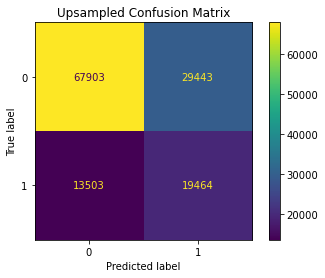

In [26]:
plot_confusion_matrix(DT_model_up, X_validation, y_validation)
plt.title("Upsampled Confusion Matrix");

This model is doing a better job of predicting class 1. The precision, recall and f1-scores can give a better indication of this.

In [27]:
y_predictions_up = DT_model_up.predict(X_validation)

In [28]:
report_up = classification_report(y_validation, y_predictions_up)
print(report_up)

              precision    recall  f1-score   support

           0       0.83      0.70      0.76     97346
           1       0.40      0.59      0.48     32967

    accuracy                           0.67    130313
   macro avg       0.62      0.64      0.62    130313
weighted avg       0.72      0.67      0.69    130313



The Decision Tree model using the upsampled data produces a better recall score for class 1. Next I'm going to re-run the model using the downsampled data.

---

### Downsampled Data

In [29]:
X_train_down = pd.read_pickle("data/X_train_under.pkl")
y_train_down = pd.read_pickle("data/y_train_under.pkl")

In [31]:
# set the cachedir
cachedir3 = mkdtemp()

# instantiate the Decision Tree model
estimators = [('model', DecisionTreeClassifier())]

# instantiate the pipeline and add input the etimators and memory
pipe = Pipeline(estimators, memory = cachedir3)

# choose what parameters to include
parameters = [
            {'model': [DecisionTreeClassifier()],
             'model__max_depth': np.arange(1, 16),
             'model__min_samples_leaf': np.arange(1, 1000, 100)
            }
]

# fit the grid, input the pipeline, the parameters and the number of cross-validation folds to include
down_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

down_fitgrid = down_grid.fit(X_train_down, y_train_down)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_sam

[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.2s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.3s
[CV] END model=DecisionTree

[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   0.3s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.4s
[CV] END model=Decision

[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=501; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.4s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.5s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.4s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   0.5s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   0.4s
[CV] END m

Save the model output.

In [32]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(down_fitgrid, 'Models/DT_down_grid.pkl')

['Models/DT_down_grid.pkl']

Get the results using `cv_results_`.

In [33]:
down_df = pd.DataFrame(down_fitgrid.cv_results_)
down_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.142866,0.002555,0.047780,0.000655,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,1,"{'model': DecisionTreeClassifier(max_depth=14,...",0.575301,0.573416,0.575138,0.576652,0.571842,0.574470,0.001668,141
1,0.142437,0.001103,0.047767,0.000569,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,101,"{'model': DecisionTreeClassifier(max_depth=14,...",0.575301,0.573416,0.575138,0.576652,0.571842,0.574470,0.001668,141
2,0.143266,0.000719,0.048032,0.000406,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,201,"{'model': DecisionTreeClassifier(max_depth=14,...",0.575301,0.573416,0.575138,0.576652,0.571842,0.574470,0.001668,141
3,0.143563,0.002251,0.048259,0.000389,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,301,"{'model': DecisionTreeClassifier(max_depth=14,...",0.575301,0.573416,0.575138,0.576652,0.571842,0.574470,0.001668,141
4,0.142489,0.001013,0.047947,0.000702,"DecisionTreeClassifier(max_depth=14, min_sampl...",1,401,"{'model': DecisionTreeClassifier(max_depth=14,...",0.575301,0.573416,0.575138,0.576652,0.571842,0.574470,0.001668,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.406649,0.004045,0.049426,0.000718,"DecisionTreeClassifier(max_depth=14, min_sampl...",15,501,"{'model': DecisionTreeClassifier(max_depth=14,...",0.642996,0.640494,0.646409,0.648867,0.645292,0.644812,0.002869,34
146,0.395752,0.004826,0.048756,0.000180,"DecisionTreeClassifier(max_depth=14, min_sampl...",15,601,"{'model': DecisionTreeClassifier(max_depth=14,...",0.641534,0.639617,0.646506,0.646950,0.646267,0.644175,0.003009,39
147,0.383561,0.003050,0.048564,0.000365,"DecisionTreeClassifier(max_depth=14, min_sampl...",15,701,"{'model': DecisionTreeClassifier(max_depth=14,...",0.641891,0.639909,0.646344,0.644252,0.642790,0.643037,0.002171,50
148,0.373576,0.002375,0.048282,0.000041,"DecisionTreeClassifier(max_depth=14, min_sampl...",15,801,"{'model': DecisionTreeClassifier(max_depth=14,...",0.643256,0.639357,0.642606,0.643115,0.644870,0.642641,0.001809,55


Get the best estimator from gridsearchcv.

In [34]:
down_fitgrid.best_estimator_

Pipeline(memory='/var/folders/z5/1yfbtl1s4fvfx1dypyr78xq40000gn/T/tmp9morv_du',
         steps=[('model',
                 DecisionTreeClassifier(max_depth=14, min_samples_leaf=101))])

Use the best_estimator_ outputs from gridsearchcv to fit another decision tree model.

In [35]:
# instantiate the model using the parameters given by the best_estimator_ output
DT_model_down = DecisionTreeClassifier(random_state = 10, max_depth = 14, min_samples_leaf = 101)

# fit the model on the X_train and y_train data
DT_model_down.fit(X_train_down, y_train_down)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model_down.score(X_train_down, y_train_down)}")
print(f"The Validation accuracy is:  {DT_model_down.score(X_validation, y_validation)}")

The Training accuracy is:  0.6736844157870105
The Validation accuracy is:  0.6601336781441606


The model performs slightly better on the training set, but I will check the confusion matrix and classification report to see how it predicts each class.

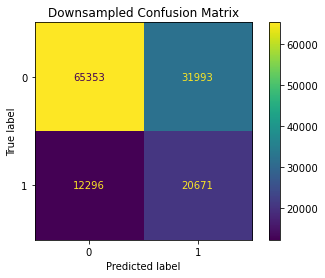

In [36]:
plot_confusion_matrix(DT_model_down, X_validation, y_validation)
plt.title("Downsampled Confusion Matrix");

This model does a better job of predicting Class 1, however the rate of False Positives appears to be higher. The precision, recall and f1-scores will give a better indication of the model performance.

Get the model predictions using X_validation.

In [37]:
y_predictions_down = DT_model_down.predict(X_validation)

Create a classification report using y_validation and the predictions calculated above.

In [38]:
report_down = classification_report(y_validation, y_predictions_down)
print(report_down)

              precision    recall  f1-score   support

           0       0.84      0.67      0.75     97346
           1       0.39      0.63      0.48     32967

    accuracy                           0.66    130313
   macro avg       0.62      0.65      0.61    130313
weighted avg       0.73      0.66      0.68    130313



The precision, recall and f1-scores are very similar to the model that used the upsampled data, with slight improvements in the recall score for class 1. Next I will use the SMOTE upsampled data to re-run the model.

---

### SMOTE Upsampled Data

Read in the SMOTE upsampled data.

In [39]:
X_train_smote = pd.read_pickle("data/X_train_smote.pkl")
y_train_smote = pd.read_pickle("data/y_train_smote.pkl")

In [40]:
cachedir4 = mkdtemp()

estimators = [('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators, memory = cachedir4)

parameters = [
            {'model': [DecisionTreeClassifier()],
             'model__max_depth': np.arange(1, 16),
             'model__min_samples_leaf': np.arange(1, 1000, 100)
            }
]

smote_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

smote_fitgrid = smote_grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_sam

[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.0s
[CV] END model=DecisionTree

[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   1.2s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   1.4s
[CV] END model=Decision

[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=501; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.4s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   1.6s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   1.7s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.9s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   1.7s
[CV] END m

Save the model output.

In [41]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(smote_fitgrid, 'Models/DT_smote_grid.pkl')

['Models/DT_smote_grid.pkl']

Store the results of gridsearchcv using `cv_results_`.

In [42]:
smote_df = pd.DataFrame(smote_fitgrid.cv_results_)
smote_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.486064,0.008567,0.152841,0.001548,DecisionTreeClassifier(max_depth=15),1,1,{'model': DecisionTreeClassifier(max_depth=15)...,0.535639,0.572770,0.643190,0.643300,0.577558,0.594491,0.042370,141
1,0.482497,0.004918,0.153783,0.001659,DecisionTreeClassifier(max_depth=15),1,101,{'model': DecisionTreeClassifier(max_depth=15)...,0.535639,0.572770,0.643190,0.643300,0.577558,0.594491,0.042370,141
2,0.483377,0.006720,0.152035,0.001137,DecisionTreeClassifier(max_depth=15),1,201,{'model': DecisionTreeClassifier(max_depth=15)...,0.535639,0.572770,0.643190,0.643300,0.577558,0.594491,0.042370,141
3,0.480415,0.004405,0.151851,0.000997,DecisionTreeClassifier(max_depth=15),1,301,{'model': DecisionTreeClassifier(max_depth=15)...,0.535639,0.572770,0.643190,0.643300,0.577558,0.594491,0.042370,141
4,0.480171,0.004223,0.151773,0.000411,DecisionTreeClassifier(max_depth=15),1,401,{'model': DecisionTreeClassifier(max_depth=15)...,0.535639,0.572770,0.643190,0.643300,0.577558,0.594491,0.042370,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.682170,0.083420,0.157246,0.001184,DecisionTreeClassifier(max_depth=15),15,501,{'model': DecisionTreeClassifier(max_depth=15)...,0.588602,0.662528,0.781300,0.780265,0.777833,0.718106,0.079101,23
146,1.673206,0.099072,0.157768,0.001540,DecisionTreeClassifier(max_depth=15),15,601,{'model': DecisionTreeClassifier(max_depth=15)...,0.585311,0.662242,0.777393,0.781003,0.775554,0.716301,0.079385,26
147,1.626977,0.083321,0.156499,0.000454,DecisionTreeClassifier(max_depth=15),15,701,{'model': DecisionTreeClassifier(max_depth=15)...,0.590407,0.657916,0.772902,0.774322,0.772946,0.713699,0.076162,37
148,1.607716,0.084829,0.157397,0.002561,DecisionTreeClassifier(max_depth=15),15,801,{'model': DecisionTreeClassifier(max_depth=15)...,0.593081,0.659556,0.770987,0.775334,0.770491,0.713890,0.074547,35


Get the best parameters from gridsearchcv using `best_estimator_`.

In [43]:
smote_fitgrid.best_estimator_

Pipeline(memory='/var/folders/z5/1yfbtl1s4fvfx1dypyr78xq40000gn/T/tmpj6t5h9m5',
         steps=[('model', DecisionTreeClassifier(max_depth=15))])

Gridsearchcv has output a max depth of 15 as the optimal parameter setting for this model.

In [44]:
# instantiate the model using the parameters given by the best_estimator_ output
DT_model_smote = DecisionTreeClassifier(random_state = 10, max_depth = 15)

# fit the model on the X_train and y_train data
DT_model_smote.fit(X_train_smote, y_train_smote)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model_smote.score(X_train_smote, y_train_smote)}")
print(f"The Validation accuracy is:  {DT_model_smote.score(X_validation, y_validation)}")

The Training accuracy is:  0.7862092648522044
The Validation accuracy is:  0.7152394619109375


The model overfits on the training data using the SMOTE upsampled data. I need to check the confusion matrix, and the classification report to see how the model predicts each class.

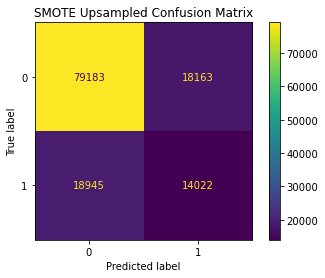

In [45]:
plot_confusion_matrix(DT_model_smote, X_validation, y_validation)
plt.title("SMOTE Upsampled Confusion Matrix");

The model predicts class 0 the majority of the time, showing that this model does not perform as well as the model with the downsampled or upsampled data.

Calculate the predictions using X_validation.

In [46]:
y_predictions_smote = DT_model_smote.predict(X_validation)

Create the classification report using y_validation and the predictions calculated above.

In [47]:
report_smote = classification_report(y_validation, y_predictions_smote)
print(report_smote)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     97346
           1       0.44      0.43      0.43     32967

    accuracy                           0.72    130313
   macro avg       0.62      0.62      0.62    130313
weighted avg       0.71      0.72      0.71    130313



Using the SMOTE upsampled data the precision and recall scores have improved as compared to the base model but it doesn't perform as well as the downsampled data. 

---

## Model Summary Table

The results of the classification reports of each model are summarized in the table below.

| Data        | Class   | Precision | Recall | F1   |
|-------------|---------|-----------|--------|------|
| Original    |         |           |        |      |
|             | Class 0 | 0.78      | 0.95   | 0.86 |
|             | Class 1 | 0.59      | 0.23   | 0.33 |
| Upsampled   |         |           |        |      |
|             | Class 0 | 0.83      | 0.70   | 0.76 |
|             | Class 1 | 0.40      | 0.59   | 0.48 |
| Downsampled |         |           |        |      |
|             | Class 0 | 0.84      | 0.67   | 0.75 |
|             | Class 1 | 0.39      | 0.63   | 0.48 |
| SMOTE       |         |           |        |      |
|             | Class 0 | 0.81      | 0.81   | 0.81 |
|             | Class 1 | 0.44      | 0.43   | 0.43 |

---

## Feature Evaluation

The best results from the optimized models were from the downsampled data sets. I will evaluate the features using the downsampled data.

Install the shap library using pip install.

In [67]:
!pip install shap

     |████████████████████████████████| 436 kB 2.0 MB/s eta 0:00:01


Use shap `TreeExplainer` to calculate shap values for a decision tree model.

In [48]:
# use the decision tree model with downsampled data
explainer = shap.TreeExplainer(DT_model_down)

# use the explainer to calculate the shap values and input the downsampled X_train_down data
shap_values = explainer.shap_values(X_train_down)

In [49]:
# create a list of the class names to be used in the shap summary plot
class_names = ["On-time", "Delayed"]

Plot the shap values using `summary_plot`. I'm plotting the values individually for each class to make interpretation easier. 

Shap summary plot for class 0 (On-time flights).

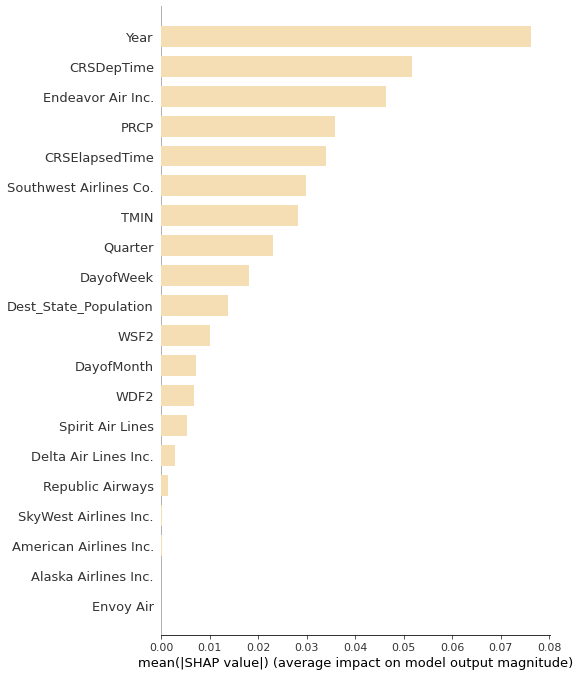

In [55]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 1
shap.summary_plot(shap_values[0], X_train_down.values, 
                  plot_type = "bar", class_names = class_names, 
                  feature_names = X_train.columns, color = 'wheat')

The results of the shapley summary plot show that Year is the biggest predictor of on-time flights, followed by the Departure Time.

---

Shap summary plot for class 1 (flight delays).

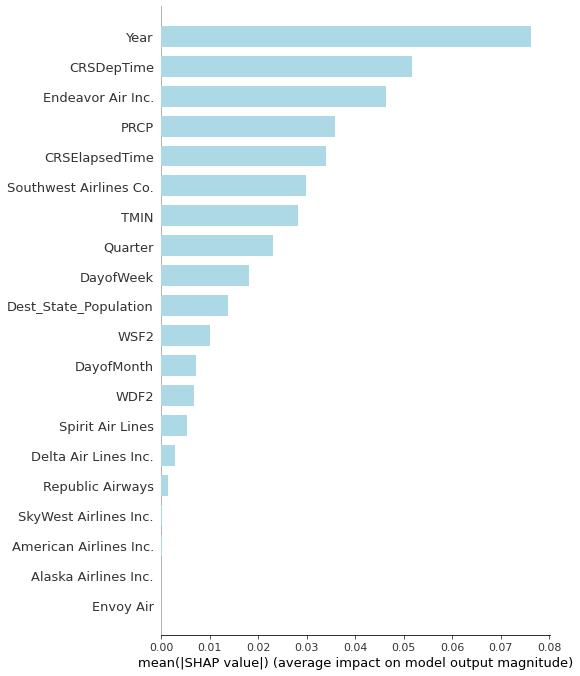

In [51]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 2
shap.summary_plot(shap_values[1], X_train_down.values, 
                  plot_type = "bar", class_names = class_names, 
                  feature_names = X_train.columns, color = "lightblue")

The results of the shapley summary plot show that Year and Departure Time are the biggest predictors of flight delays.

---

---

The plots above show which features are most important in predicting each class, but they don't show how the feature values are affecting the predictions.

The same shapley values can be used for global interpretation of the features. Plots are created for each class and explained below.

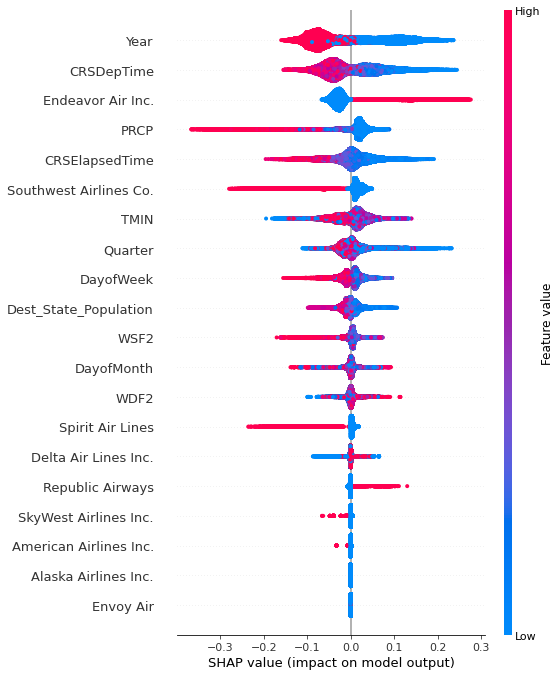

In [52]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 0
shap.summary_plot(shap_values[0], X_train_down.values, feature_names = X_train.columns)


As shown above Year is the biggest predictor for on-time flights. This plot shows that higher values for Year (2021) have a negative impact on predicting on-time flights, meaning that more flights were on-time in 2020. Likewise with Departure Time, leaving earlier in the day (lower values of CRSDepTime) are more predictive of on-time flights.

---

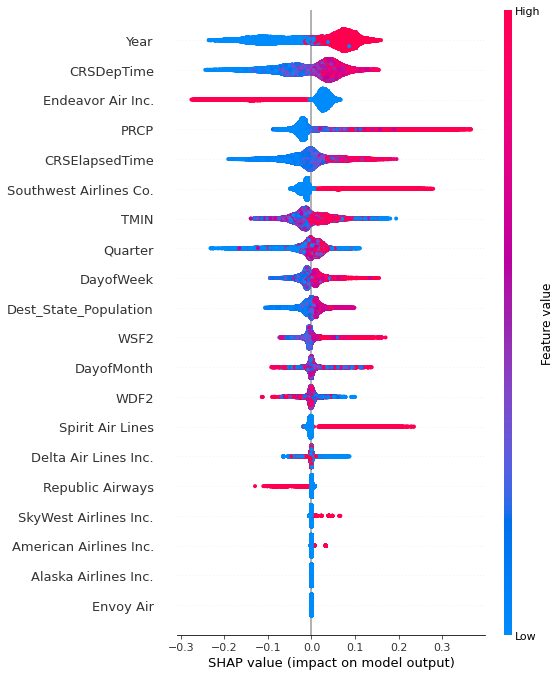

In [53]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 1
shap.summary_plot(shap_values[1], X_train_down.values, feature_names = X_train.columns)


The plot above shows that higher values for Year (2021) were higher predictors of delayed flights, meaning that flights that occurred in 2021 were more likely to be delayed. Similarly to the plot above, departure time is a strong predictor for delayed flights, however in this, leaving later in the day is more likely to result in a departure delay. 

---

## Next Steps

In the final notebook (Notebook 7) I will explore XGBoost models to see if I can further improve the f1-scores.

---